<a href="https://colab.research.google.com/github/jaewonlee16/torch_tutorial/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.init

import matplotlib.pyplot as plt
import random

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print ('current device: ', device)


current device:  cuda


In [3]:
training_epochs = 10
batch_size = 100
learning_rate = 1e-3

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 168376570.82it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 22304491.59it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 64204866.47it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3474471.78it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [5]:
dataloader = DataLoader(dataset = mnist_train, batch_size=batch_size, shuffle=True, drop_last = True)

In [ ]:
linear = nn.Linear(784, 10).to(device)

linear2 = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
).to(device)

In [6]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    # first layer
    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride = 2)
    )

    self.fc = nn.Linear(7 * 7* 64, 10, bias = True)

    nn.init.xavier_uniform_(self.fc.weight)

  def forward(self, x):
    """
    input : torch.Size([100, 1, 28, 28])
    layer1 output : torch.Size([100, 32, 14, 14])
    layer2 output : torch.Size([100, 64, 7, 7])
    result : torch.Size([100, 10])
    """
    print('input : {}'.format(x.shape))
    out = self.layer1(x)
    print('layer1 output : {}'.format(out.shape))
    out = self.layer2(out)
    print('layer2 output : {}'.format(out.shape))
    out = out.view(out.size(0), -1)
    out = self.fc(out)
    print('result : {}'.format(out.shape))
    return out

In [7]:
#model = linear2
model = CNN().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(dataloader)
    for X, Y in dataloader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        #X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), '/', training_epochs, 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

input : torch.Size([100, 1, 28, 28])
layer1 output : torch.Size([100, 32, 14, 14])
layer2 output : torch.Size([100, 64, 7, 7])
result : torch.Size([100, 10])
input : torch.Size([100, 1, 28, 28])
layer1 output : torch.Size([100, 32, 14, 14])
layer2 output : torch.Size([100, 64, 7, 7])
result : torch.Size([100, 10])
input : torch.Size([100, 1, 28, 28])
layer1 output : torch.Size([100, 32, 14, 14])
layer2 output : torch.Size([100, 64, 7, 7])
result : torch.Size([100, 10])
input : torch.Size([100, 1, 28, 28])
layer1 output : torch.Size([100, 32, 14, 14])
layer2 output : torch.Size([100, 64, 7, 7])
result : torch.Size([100, 10])
input : torch.Size([100, 1, 28, 28])
layer1 output : torch.Size([100, 32, 14, 14])
layer2 output : torch.Size([100, 64, 7, 7])
result : torch.Size([100, 10])
input : torch.Size([100, 1, 28, 28])
layer1 output : torch.Size([100, 32, 14, 14])
layer2 output : torch.Size([100, 64, 7, 7])
result : torch.Size([100, 10])
input : torch.Size([100, 1, 28, 28])
layer1 output :

KeyboardInterrupt: ignored

Accuracy: 0.9853999614715576
Label:  8
Prediction:  8


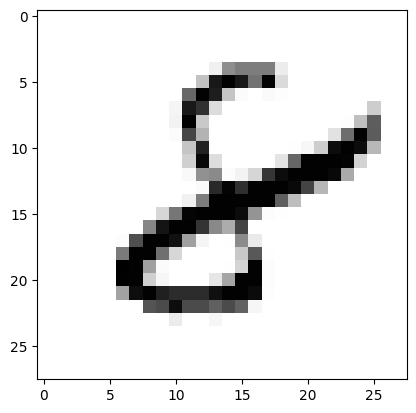

In [ ]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    #X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    #X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    X_single_data = mnist_test.test_data[r:r + 1].view(1, 1, 28, 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()